In [1]:
import glob

# Willow Fox Fortino's modules
import GPRutils
import vK2KGPR
import plotGPR
import vonkarmanFT as vk

# Science modules
import numpy as np
import astropy.units as u

Created TAP+ (v1.2.1) - Connection:
	Host: gea.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443
Created TAP+ (v1.2.1) - Connection:
	Host: geadata.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443


In [14]:
exposure = 361580
dataC = GPRutils.loadFITS(glob.glob(f"../thesis/{exposure}/DES{exposure}_?.fits")[0])

In [15]:
x = dataC.TV["X"][dataC.TV["Maskf"]]
y = dataC.TV["Y"][dataC.TV["Maskf"]]
dx = dataC.TV["dX"][dataC.TV["Maskf"]]
dy = dataC.TV["dY"][dataC.TV["Maskf"]]
err = np.sqrt(dataC.TV["DES variance"][dataC.TV["Maskf"]])

x2 = x
y2 = y
dx2 = dx - dataC.TV["fbar_s dX"][dataC.TV["Maskf"]]
dy2 = dy - dataC.TV["fbar_s dY"][dataC.TV["Maskf"]]
err2 = err

In [16]:
print("Jackknifed xi+ (Inter-set pairs included)")
xi0 = dataC.header["allPairs_xi0"]
Xerr = dataC.header["allPairs_xi0_Xerr"]
Yerr = dataC.header["allPairs_xi0_Yerr"]
print(f"xi0: {np.round(xi0, 3)} ± {np.round(np.sqrt(Xerr**2 + Yerr**2), 3)} mas^2")
xif = dataC.header["allPairs_xif"]
Xerr = dataC.header["allPairs_xif_Xerr"]
Yerr = dataC.header["allPairs_xif_Yerr"]
print(f"xif: {np.round(xif, 3)} ± {np.round(np.sqrt(Xerr**2 + Yerr**2), 3)} mas^2")
print(f"Reduction: {np.round(xi0/xif, 3)}")
print()


print("Jackknifed xi+ (Inter-set pairs excluded)")
xi0 = dataC.header["xi0"]
Xerr = dataC.header["xi0_Xerr"]
Yerr = dataC.header["xi0_Yerr"]
print(f"xi0: {np.round(xi0, 3)} ± {np.round(np.sqrt(Xerr**2 + Yerr**2), 3)} mas^2")
xif = dataC.header["xif"]
Xerr = dataC.header["xif_Xerr"]
Yerr = dataC.header["xif_Yerr"]
print(f"xif: {np.round(xif, 3)} ± {np.round(np.sqrt(Xerr**2 + Yerr**2), 3)} mas^2")
print(f"Reduction: {np.round(xi0/xif, 3)}")

Jackknifed xi+ (Inter-set pairs included)
xi0: 141.959 ± 2.979 mas^2
xif: -23.438 ± 2.692 mas^2
Reduction: -6.057

Jackknifed xi+ (Inter-set pairs excluded)
xi0: 138.661 ± 6.606 mas^2
xif: 31.695 ± 5.847 mas^2
Reduction: 4.375


In [17]:
dataC.fitCorrParams

array([1.32504779e+02, 2.15173882e+00, 1.59165467e-02, 6.96918793e-03,
       2.08840050e-01])

In [18]:
dataC.params

array([ 3.61814098e+02, -1.58835770e-02,  1.66029019e-01, -8.79880823e-04,
        1.83575305e-03])

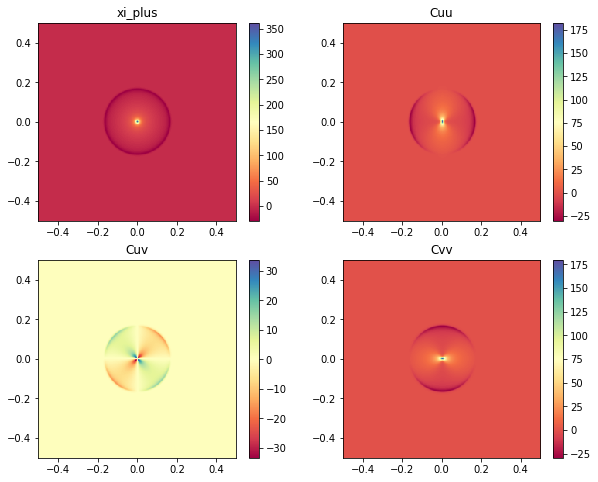

In [19]:
ttt = vk.TurbulentLayer(
    variance=dataC.params[0],
    outerScale=dataC.params[1],
    diameter=dataC.params[2],
    wind=(dataC.params[3], dataC.params[4]))
vk.plotCuv(ttt)

/home/fortino/DESworkspace/GPRutils.py:852: RuntimeWarning: invalid value encountered in true_divide
  sumWeights_x / sumWeights,
/home/fortino/DESworkspace/GPRutils.py:856: RuntimeWarning: invalid value encountered in true_divide
  sumWeights_y / sumWeights,
/home/fortino/DESworkspace/GPRutils.py:860: RuntimeWarning: divide by zero encountered in reciprocal
  sumWeights**-1.,
/home/fortino/DESworkspace/GPRutils.py:871: RuntimeWarning: invalid value encountered in less
  sumWeights < (maxErr**2.).value)
/home/fortino/DESworkspace/GPRutils.py:878: RuntimeWarning: invalid value encountered in greater
  RMS_x = np.std(sumWeights_x[sumWeights > 0.])*u.mas
/home/fortino/DESworkspace/GPRutils.py:879: RuntimeWarning: invalid value encountered in greater
  RMS_y = np.std(sumWeights_y[sumWeights > 0.])*u.mas
/home/fortino/DESworkspace/GPRutils.py:880: RuntimeWarning: invalid value encountered in greater
  noise = np.sqrt(np.mean(sumWeights[sumWeights > 0.]))*u.mas


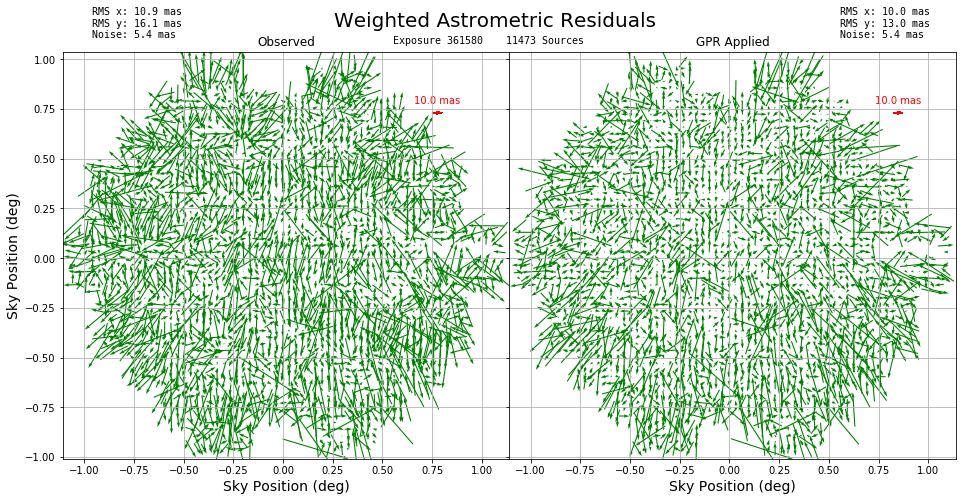

In [8]:
plotGPR.AstrometricResiduals(
    x, y, dx, dy, err,
    x2=x2, y2=y2, dx2=dx2, dy2=dy2, err2=err2,
    exposure=dataC.expNum,
    pixelsPerBin=450,
    scale=200*u.mas,
    arrowScale=10*u.mas,
#     savePath="testexp"
)

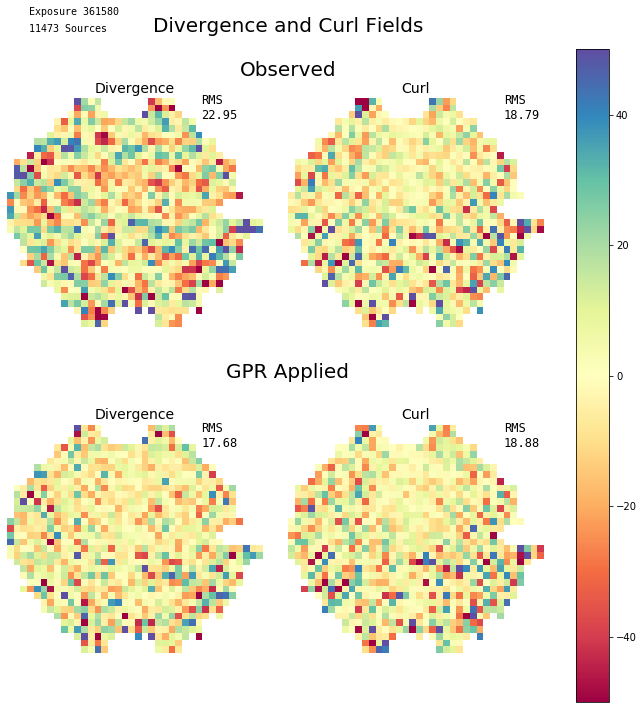

In [9]:
plotGPR.DivCurl(
    x, y, dx, dy, err,
    x2=x2, y2=y2, dx2=dx2, dy2=dy2, err2=err2,
    exposure=dataC.expNum,
    pixelsPerBin=750,
    scale=50,
#     savePath="testexp"
)

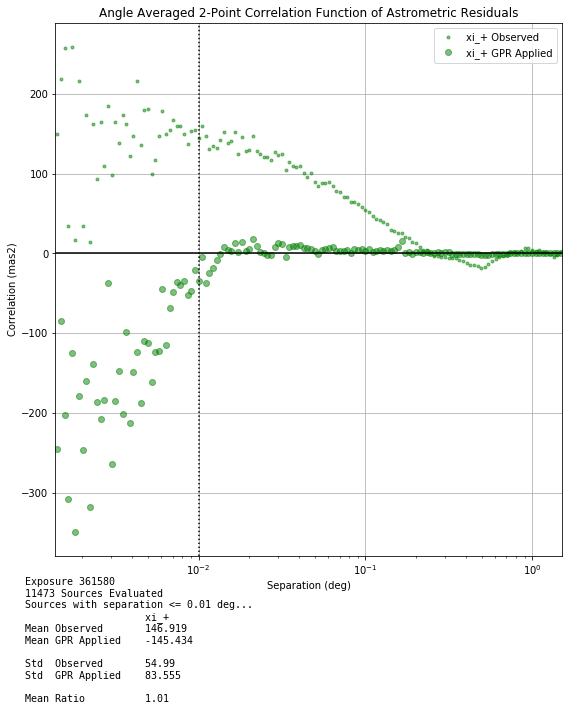

In [10]:
plotGPR.Correlation(
    x, y, dx, dy,
    x2=x2, y2=y2, dx2=dx2, dy2=dy2,
    exposure=dataC.expNum,
    ylim=(None, None),
    xiE_ON=False,
    xiB_ON=False,
    xiplus_ON=True,
#     savePath="testexp"
)

In [ ]:
plotGPR.Correlation2D(
    x, y, dx, dy,
    x2=x2, y2=y2, dx2=dx2, dy2=dy2,
    exposure=dataC.expNum,
    nBins=100,
    vmin=-25*u.mas**2,
    vmax=25*u.mas**2,
    rmax=0.50*u.deg,
#     savePath="testexp"
)